In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from src import data_reader

Running in stage: dev


In [3]:
X_train, subject_train, activity_train, feature_names = data_reader.get_timeseries_data('train')

In [4]:
X_train.shape

(3285, 6, 128, 1)

In [5]:
X_train, subject_train, activity_train, feature_names = data_reader.get_timeseries_data('test')

In [6]:
X_train.shape

(1387, 6, 128, 1)

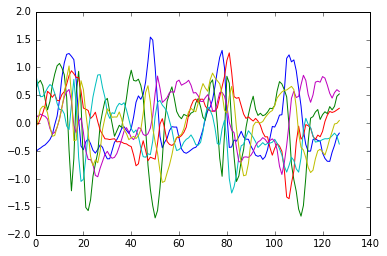

In [7]:
for i in range(X_train.shape[1]):
    plt.plot(X_train[0, i])

In [8]:
activity_train

array([[2],
       [1],
       [3],
       ..., 
       [1],
       [1],
       [2]])

In [9]:
walking_idx = np.nonzero(activity_train == 1)[0]
walking_upstairs_idx = np.nonzero(activity_train == 2)[0]
walking_downstairs_idx = np.nonzero(activity_train == 3)[0]

In [10]:
walking_data = X_train[walking_idx]
walking_upstairs_data = X_train[walking_upstairs_idx]
walking_downstairs_data = X_train[walking_downstairs_idx]

In [11]:
separate_data = [walking_data, walking_upstairs_data, walking_downstairs_data]

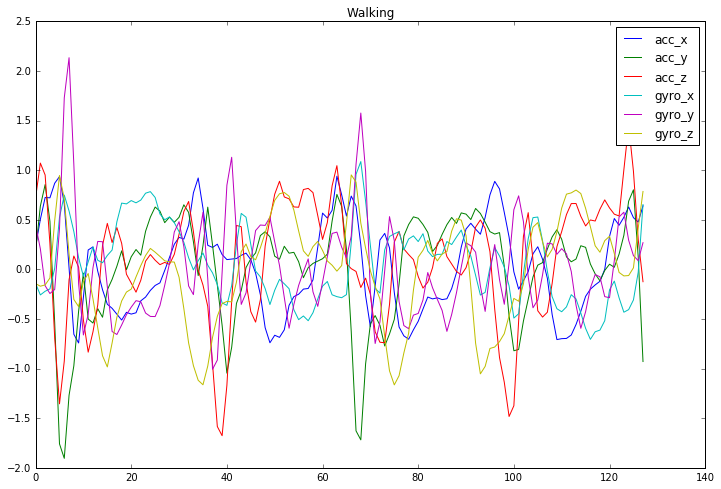

In [12]:
plt.figure(figsize=(12,8))
for i in range(X_train.shape[1]):
    plt.plot(walking_data[0, i], label=feature_names[i])
plt.title("Walking")
plt.legend()
plt.savefig('images/walking_raw_large.png', bbox_inches='tight')

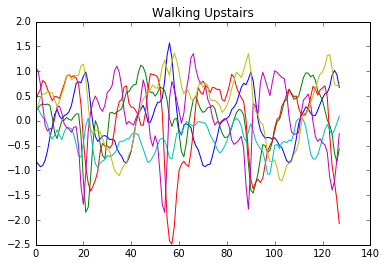

In [13]:
for i in range(X_train.shape[1]):
    plt.plot(walking_upstairs_data[4, i])
plt.title("Walking Upstairs")

In [14]:
class_labels = np.array(['Walking', 'Walking Upstairs', 'Walking Downstairs'])

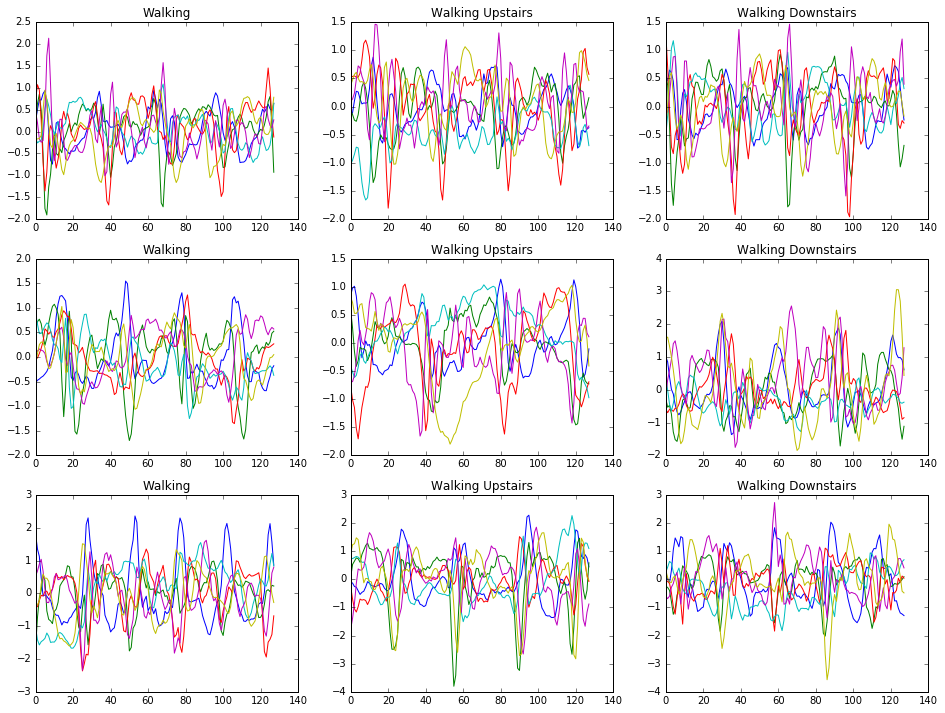

In [15]:
# Use the same test subject for rows
f, axarr = plt.subplots(3, 3, figsize=(16,12))

for i in range(3):
    for j in range(3):
        axarr[i, j].set_title(class_labels[j])
        for k in range(X_train.shape[1]):
            axarr[i, j].plot(separate_data[i][j, k])
        

In [16]:
f.savefig('images/raw_data.png', bbox_inches='tight')

In [17]:
feature_names

['acc_x', 'acc_y', 'acc_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [18]:
X_train.shape

(1387, 6, 128, 1)